Mounted at /content/drive
Train data Accuracy: 0.831302717900656
Train data Precision: 0.8322597378690026
Train data Recall: 0.831302717900656
Train data F1 Score: 0.8314538487333942
Train data ROC AUC Score: 0.9620926501032336

Validation data Accuracy: 0.7210460772104608
Validation data Precision: 0.7218227469946931
Validation data Recall: 0.7210460772104608
Validation data F1 Score: 0.7207307581184013
Validation data ROC AUC Score: 0.902817660038677

Test data Accuracy: 0.715
Test data Precision: 0.7203252730188245
Test data Recall: 0.715
Test data F1 Score: 0.7165240370580915
Test data ROC AUC Score: 0.9051375


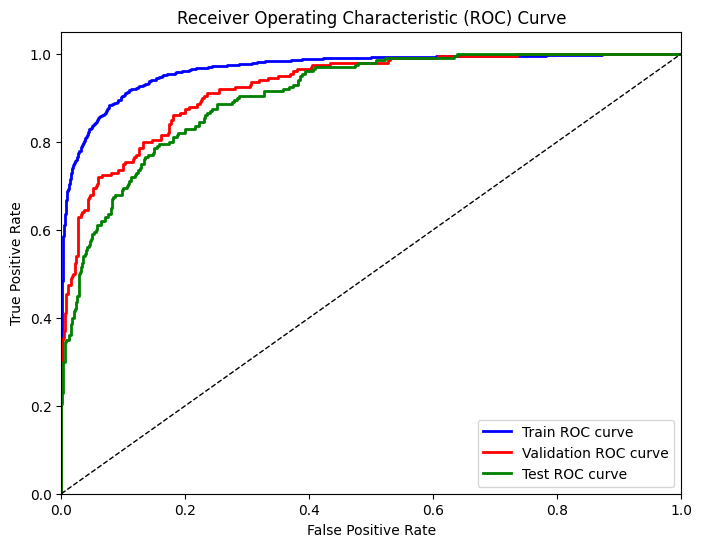

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_curve, roc_auc_score, recall_score
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Function to load images and labels from folder
def load_images_and_labels(folder, target_size=(100, 100)):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        label = subfolder
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            try:
                img = imread(image_path)
                if img is not None:
                    img_resized = resize(img, target_size, anti_aliasing=True)  # Resize image to target size
                    images.append(img_resized.flatten())  # Flatten the resized image array
                    labels.append(label)
                else:
                    print(f"Error reading image: {image_path}")
            except Exception as e:
                print(f"Error loading image: {image_path} - {str(e)}")
    return np.array(images), np.array(labels)

# Folder paths
train_folder = '/content/drive/MyDrive/Cashew/train'
test_folder = '/content/drive/MyDrive/Cashew/test'
val_folder = '/content/drive/MyDrive/Cashew/val'

# Load images and labels for training, testing, and validation
X_train, y_train = load_images_and_labels(train_folder)
X_test, y_test = load_images_and_labels(test_folder)
X_val, y_val = load_images_and_labels(val_folder)

# Initialize SVM model
svm_model = SVC(probability=True)  # Ensure probabilities are enabled

# Train the SVM model
svm_model.fit(X_train, y_train)

# Evaluate on train data
train_pred = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='weighted')
train_recall = recall_score(y_train, train_pred, average='weighted')
train_f1 = f1_score(y_train, train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, svm_model.predict_proba(X_train), average='macro', multi_class='ovr')
fpr_train, tpr_train, _ = roc_curve(y_train, svm_model.predict_proba(X_train)[:, 1], pos_label=svm_model.classes_[1])

# Evaluate on validation data
val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_pred)
val_precision = precision_score(y_val, val_pred, average='weighted')
val_recall = recall_score(y_val, val_pred, average='weighted')
val_f1 = f1_score(y_val, val_pred, average='weighted')
val_roc_auc = roc_auc_score(y_val, svm_model.predict_proba(X_val), average='macro', multi_class='ovr')
fpr_val, tpr_val, _ = roc_curve(y_val, svm_model.predict_proba(X_val)[:, 1], pos_label=svm_model.classes_[1])

# Evaluate on test data
test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='weighted')
test_recall = recall_score(y_test, test_pred, average='weighted')
test_f1 = f1_score(y_test, test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test), average='macro', multi_class='ovr')
fpr_test, tpr_test, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1], pos_label=svm_model.classes_[1])

# Print evaluation metrics
print("Train data Accuracy:", train_accuracy)
print("Train data Precision:", train_precision)
print("Train data Recall:", train_recall)
print("Train data F1 Score:", train_f1)
print("Train data ROC AUC Score:", train_roc_auc)

print("\nValidation data Accuracy:", val_accuracy)
print("Validation data Precision:", val_precision)
print("Validation data Recall:", val_recall)
print("Validation data F1 Score:", val_f1)
print("Validation data ROC AUC Score:", val_roc_auc)

print("\nTest data Accuracy:", test_accuracy)
print("Test data Precision:", test_precision)
print("Test data Recall:", test_recall)
print("Test data F1 Score:", test_f1)
print("Test data ROC AUC Score:", test_roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve')
plt.plot(fpr_val, tpr_val, color='red', lw=2, label='Validation ROC curve')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
